In [18]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np, scipy.special as ss, seaborn as sns, deal_fig_style as dfs
figsize = dfs.set_style(plt.rcParams, plt.gca(), perso_linewidth=0.5)
plt.close()
from scipy.special import gammainc as lower_gamma
from scipy.special import gammaincc as upper_gamma
blue = sns.xkcd_rgb['dusty blue']
red = sns.xkcd_rgb['dusky rose']
gold = sns.xkcd_rgb['gold']
green = sns.xkcd_rgb['dusty green']
gray = sns.xkcd_rgb['light grey']
ms = 12
alf = 0.05

In [19]:
import erosion_model as erosion
em = erosion.model(mode='fast')

In [26]:

nx = 10000
ETmaxmax = 4.
ETmaxmin = .1
alphamax = 4.
alphamin = 0.1
lamdamax = 1.
lamdamin= 0.01
hsmax = 5.
hsmin = 0.05
taumax = 50
taumin = 1
yf = 3650.

ETmax = np.random.normal(loc=(ETmaxmax + ETmaxmin)/2.,scale=(ETmaxmax - ETmaxmin)/4., size=nx)
ETmax[ETmax <= 0.] = np.nan
# alpha = np.random.normal(loc=(alphamax + alphamin)/2., scale=(alphamax - alphamin)/4., size= nx)
# alpha[alpha <= 0.] = np.nan
lamda = np.random.normal(loc=(lamdamax + lamdamin)/2., scale=(lamdamax - lamdamin)/6., size= nx)
lamda[lamda <= 0.] = np.nan
lamda[lamda >= 1.] = np.nan
alpha = 1./(1. - lamda)
hsol = np.random.normal(loc=(hsmax + hsmin)/2., scale=(hsmax - hsmin)/5., size=nx)
hsol[hsol <= 0.] = np.nan
tau = np.random.normal(loc=(taumax + taumin)/2., scale=(taumax - taumin)/5., size=nx)
# sns.distplot(tau)
# sns.despine()
tau[tau <= 0.] = np.nan

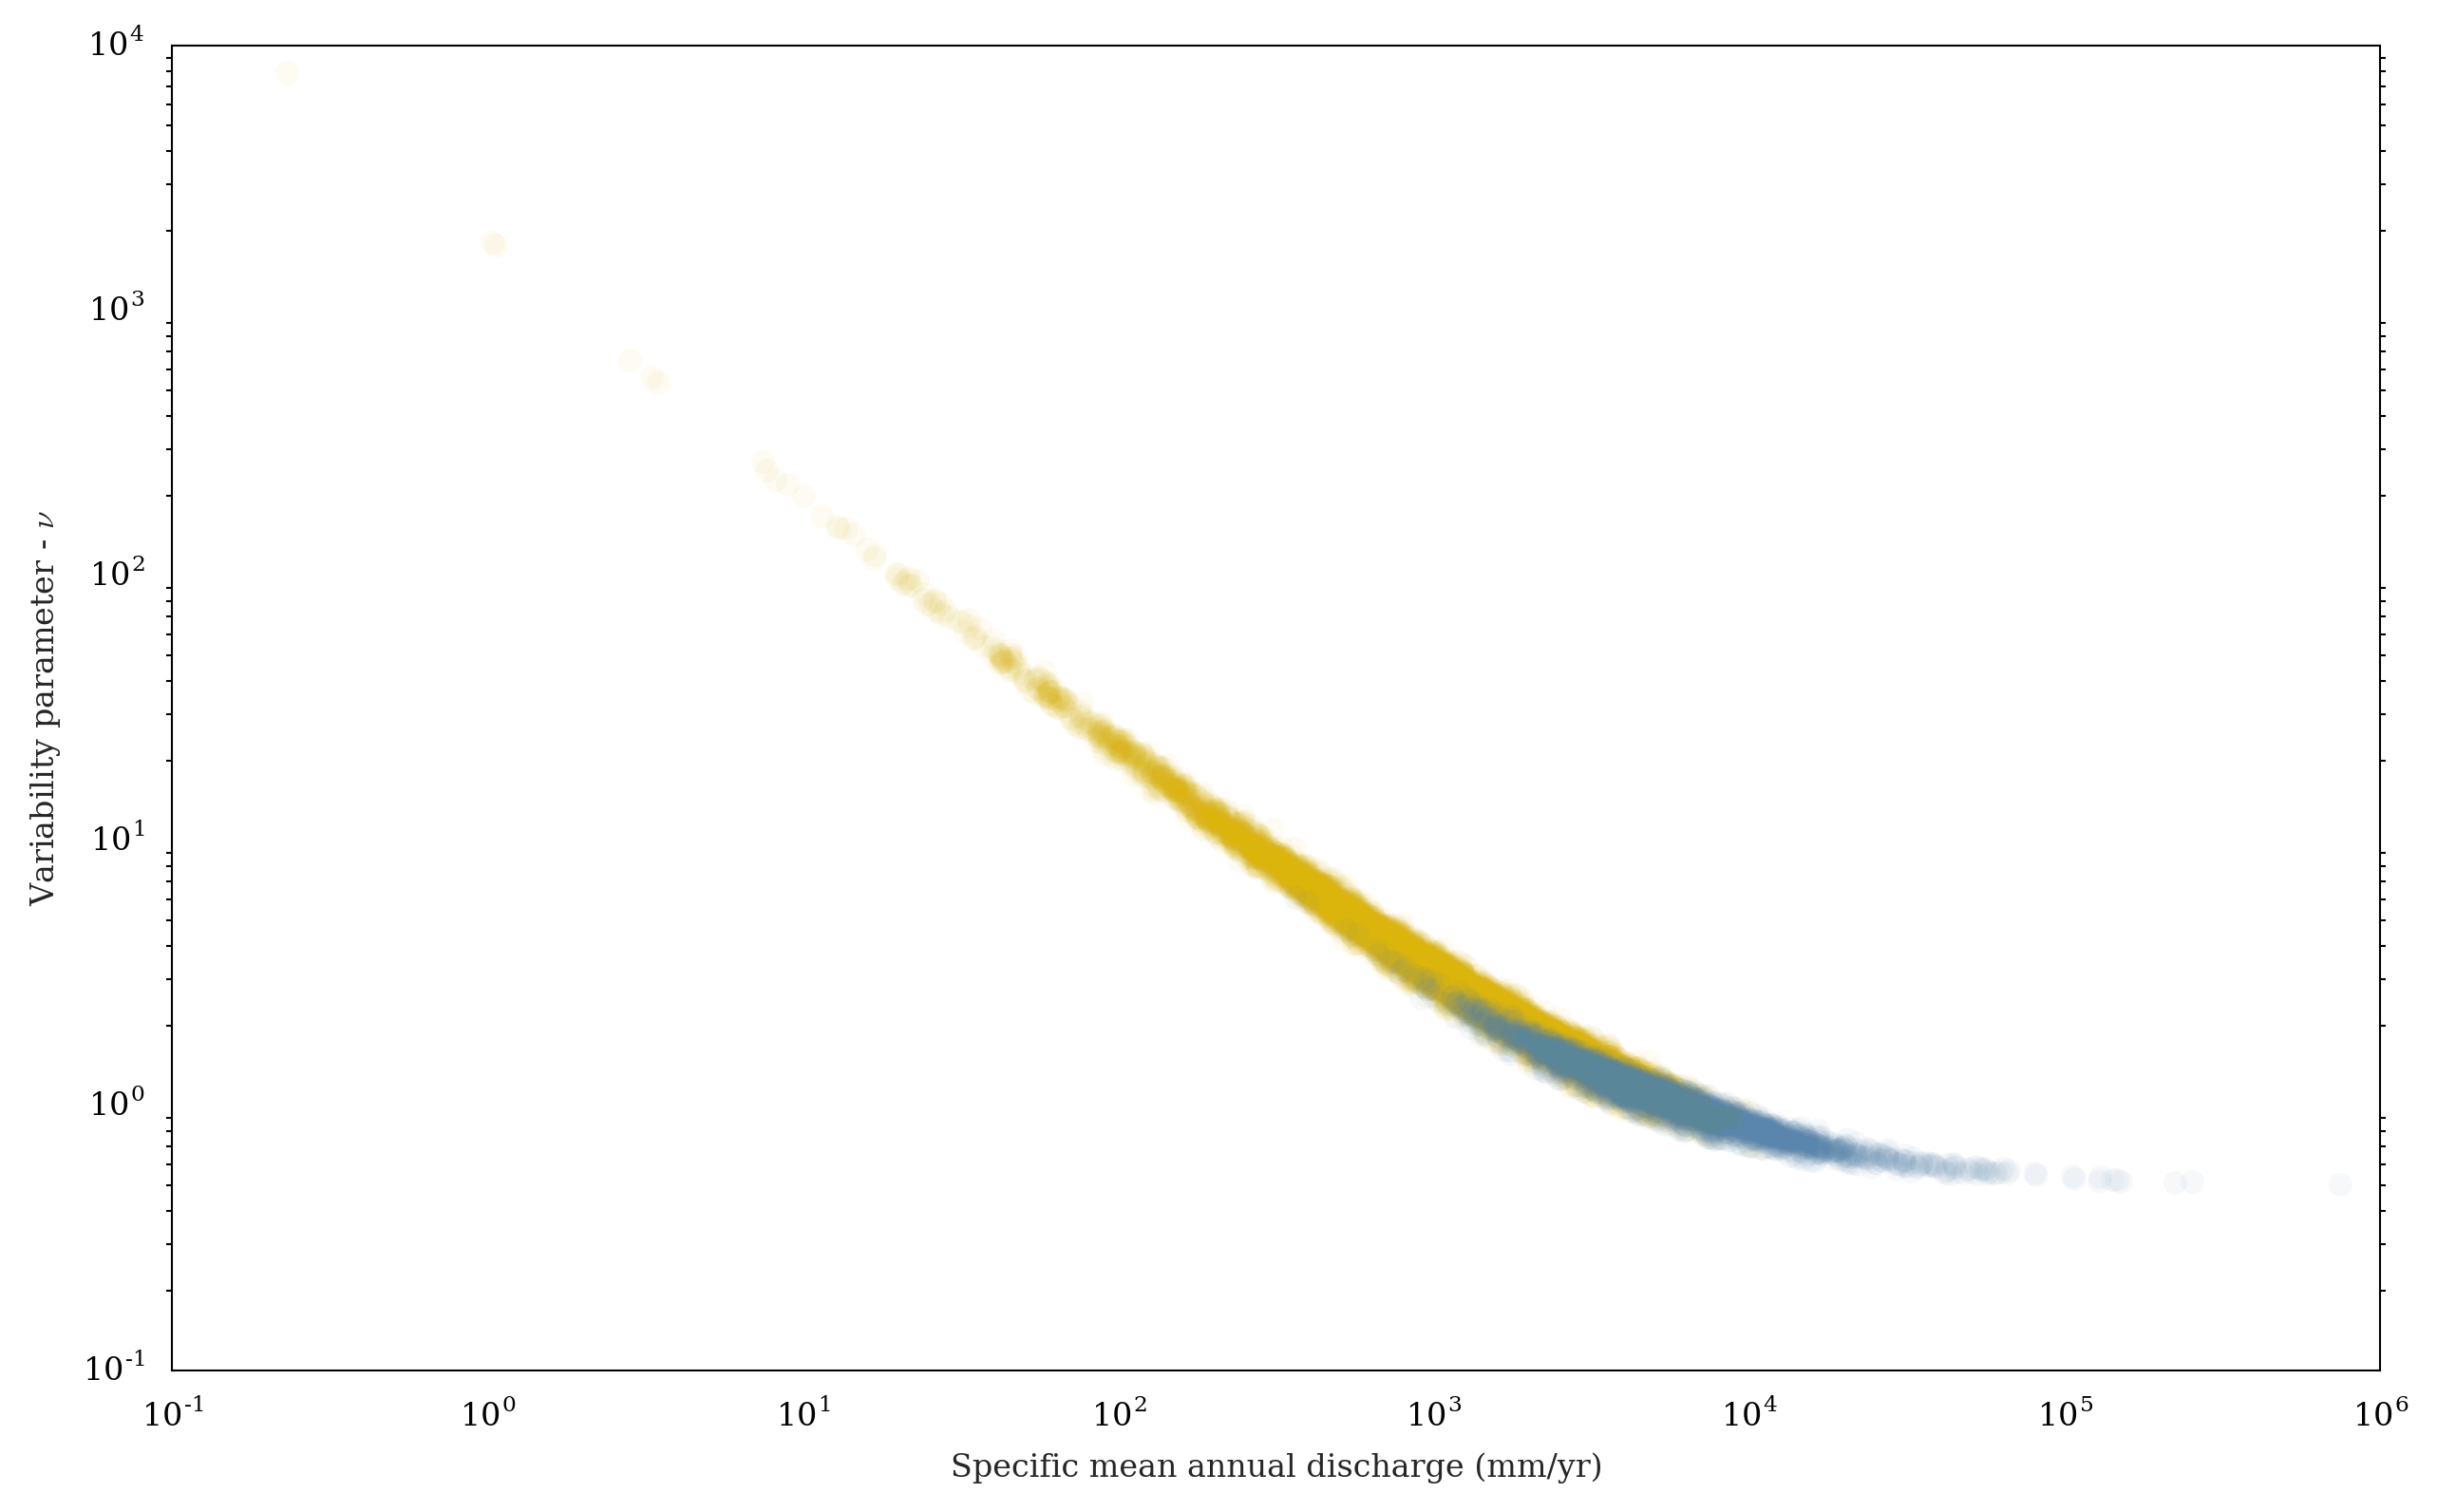

In [27]:
# create figure and set size
fig = plt.figure(1,figsize=(10, 6))

nu = np.zeros(nx)
mu = np.zeros(nx)
count = 0
for ii in range(nx):
    em.set_var(ETmax=ETmax[ii], alpha=alpha[ii], lamda=lamda[ii], hsol=hsol[ii], tau=tau[ii])
    if np.isfinite(em.nu) and np.isfinite(em.mu):
        if em.Di > 1:
            nu[count] = em.nu
            mu[count] = em.mu
            count += 1

plt.plot(mu*yf, 1./nu, '.', color=gold, ms=ms, alpha=alf)

nu = np.zeros(nx)
mu = np.zeros(nx)
count = 0
for ii in range(nx):
    em.set_var(ETmax=ETmax[ii], alpha=alpha[ii], lamda=lamda[ii], hsol=hsol[ii], tau=tau[ii])
    if np.isfinite(em.nu) and np.isfinite(em.mu):
        if em.Di < 1:
            nu[count] = em.nu
            mu[count] = em.mu
            count += 1

plt.loglog(mu*yf, 1./nu, '.', color=blue, ms=ms, alpha=alf)

# plt.xlim([1e0, 1e4])
# plt.ylim([1e-1, 1e1])
plt.ylabel(r'Variability parameter - $\nu$')
plt.xlabel('Specific mean annual discharge (mm/yr)')